In [1]:
# Basic Monte Carlo II

import random
import numpy as np

def generate_walk(L):
    """
    Generates a self-avoiding walk (SAW) of length L using importance sampling.

    The walk starts at the origin (0,0). At each step, a move is chosen uniformly 
    from the set of available self-avoiding moves. The function calculates the
    product of the number of valid choices at each step.

    If a walk reaches a dead end (no valid moves left), it stays in place for 
    the remaining steps.

    The results of multiple runs of the function are averaged to obtain
    an estimate of the expected value of c_L.

    Returns:
        result (float): One value for the Monte Carlo estimate of c_L
    """
    pos = (0, 0)  # Start at the origin
    visited = {pos}  # Track visited positions to ensure self-avoidance
    moves = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Possible moves (Up, Right, Down, Left)
    result = 1  # Accumulate the product of valid moves at each step

    for _ in range(L): # Loop over each step of the walk
        valid_moves = []
        
        # Check all possible moves and keep only the valid (non-visited) ones
        for move in moves:
            new_pos = (pos[0] + move[0], pos[1] + move[1])
            if new_pos not in visited:
                valid_moves.append(move)
        
        # Multiply by the number of valid moves to compute the realisation
        result *= len(valid_moves)
        
        # If valid moves exist, choose one randomly and update position
        if valid_moves:
            dx, dy = random.choice(valid_moves)
            new_pos = (pos[0] + dx, pos[1] + dy)
            visited.add(new_pos)
            pos = new_pos

    return result

In [ ]:
# Compute Monte Carlo estimates for c_L for L = 0 to 10 using 100,000 samples per length
for i in range(11):
    samples = [generate_walk(i) for _ in range(100000)]
    print(f"Estimated c_{i}: {np.mean(samples)}")

Estimated c_0: 1.0
Estimated c_1: 4.0
Estimated c_2: 12.0
Estimated c_3: 36.0
Estimated c_4: 100.01844
Estimated c_5: 284.1804
Estimated c_6: 780.22872
Estimated c_7: 2171.69424
Estimated c_8: 5923.16388
Estimated c_9: 16263.06012
Estimated c_10: 43948.55232


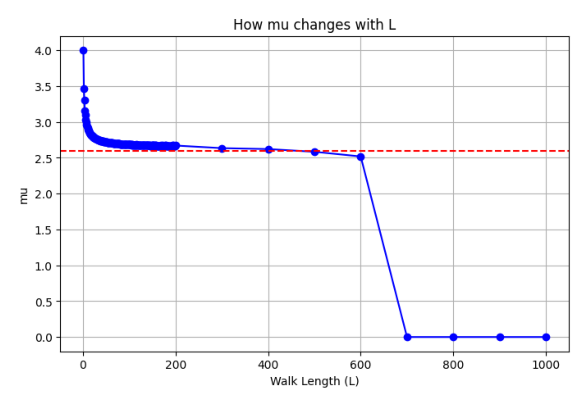

In [ ]:
# Estimate c_L up to L = 1000 and plot the graph of mu estimate against L
# c_L approximates mu^L, mu hat = c_L^(1/L)

L_values = list(np.arange(201))
L_values.extend(list(np.arange(300, 1001, 100)))

mu_hats = []

# 100,000 samples for each L value
for L in L_values:
    samples = [generate_walk(L) for _ in range(100000)]
    cL_hat = np.mean(samples)
    mu_hats.append(cL_hat**(1/L))

import matplotlib.pyplot as plt

# plot mu_hats against L

plt.figure(figsize=(8, 5))
plt.plot(L_values, mu_hats, marker='o', linestyle='-', color='b')
plt.xlabel('Walk Length (L)')
plt.ylabel('mu')
plt.title('How mu changes with L')
plt.grid()
plt.axhline(y=2.6, color='r', linestyle='--', label='mu approx 2.6')
plt.show()